In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
df = pd.read_csv('BMW.csv')
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  object 
 1   Year                  50000 non-null  int64  
 2   Region                50000 non-null  object 
 3   Color                 50000 non-null  object 
 4   Fuel_Type             50000 non-null  object 
 5   Transmission          50000 non-null  object 
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  int64  
 8   Price_USD             50000 non-null  int64  
 9   Sales_Volume          50000 non-null  int64  
 10  Sales_Classification  50000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 4.2+ MB


,Year,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2017.015700,3.247180,100307.203140,75034.600900,5067.514680
std,4.324459,1.009078,57941.509344,25998.248882,2856.767125
min,2010.000000,1.500000,3.000000,30000.000000,100.000000
25%,2013.000000,2.400000,50178.000000,52434.750000,2588.000000
50%,2017.000000,3.200000,100388.500000,75011.500000,5087.000000
75%,2021.000000,4.100000,150630.250000,97628.250000,7537.250000
max,2024.000000,5.000000,199996.000000,119998.000000,9999.000000


In [17]:
df.isnull().sum()
df = df.drop_duplicates()
df['Year'] = df['Year'].astype(int)
df['Price_USD'] = pd.to_numeric(df['Price_USD'], errors='coerce')
df['Sales_Volume'] = pd.to_numeric(df['Sales_Volume'], errors='coerce')

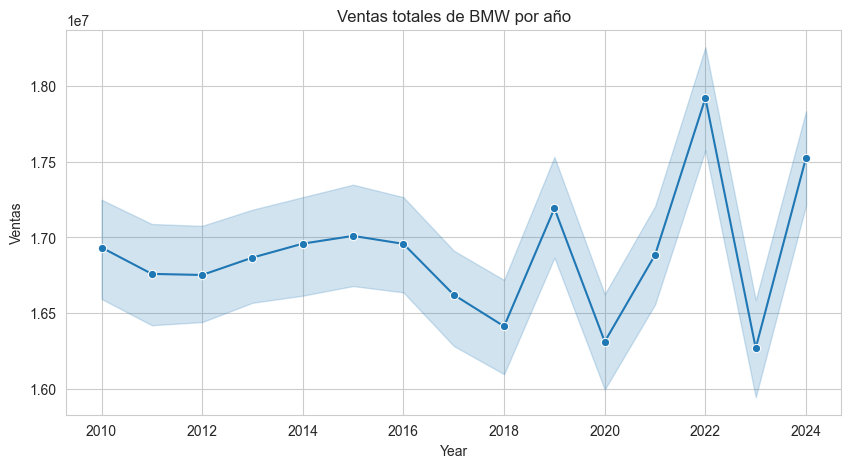

In [18]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='Year', y='Sales_Volume', estimator='sum', marker='o')
plt.title('Ventas totales de BMW por año')
plt.ylabel('Ventas')
plt.show()

C:\Users\User win10pro\AppData\Local\Temp\ipykernel_11764\3897274884.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_modelos.values, y=top_modelos.index, palette='Blues_d')


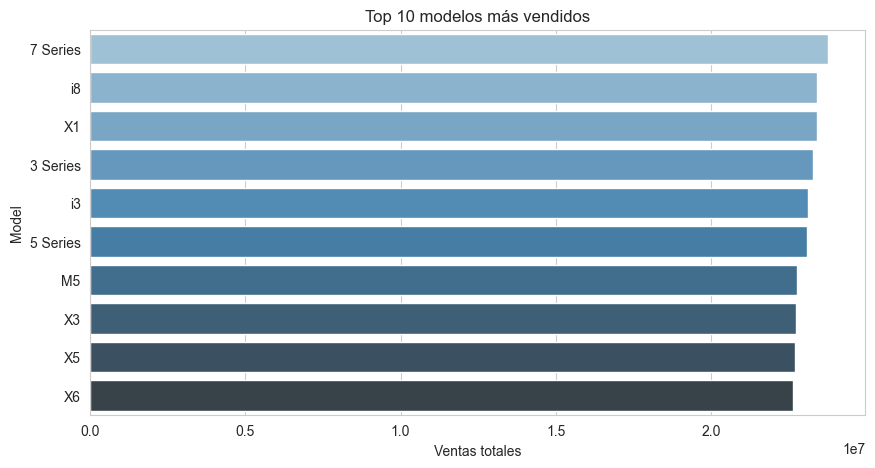

In [19]:
top_modelos = df.groupby('Model')['Sales_Volume'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_modelos.values, y=top_modelos.index, palette='Blues_d')
plt.title('Top 10 modelos más vendidos')
plt.xlabel('Ventas totales')
plt.show()

C:\Users\User win10pro\AppData\Local\Temp\ipykernel_11764\4054063620.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_ventas.values, y=region_ventas.index, palette='Set2')


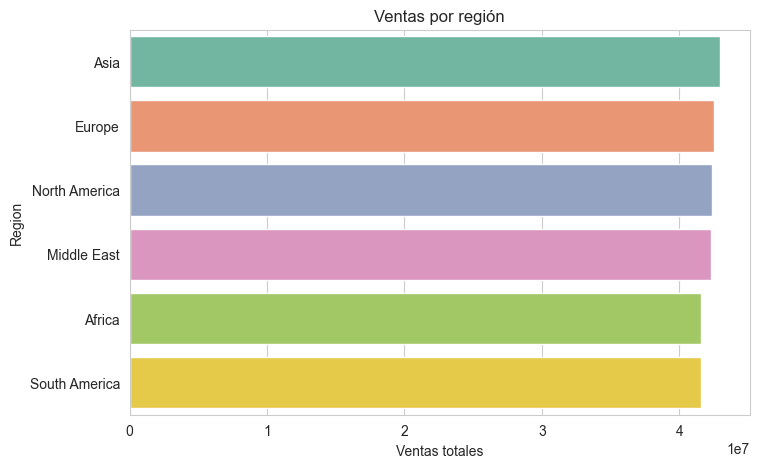

In [20]:
region_ventas = df.groupby('Region')['Sales_Volume'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x=region_ventas.values, y=region_ventas.index, palette='Set2')
plt.title('Ventas por región')
plt.xlabel('Ventas totales')
plt.show()

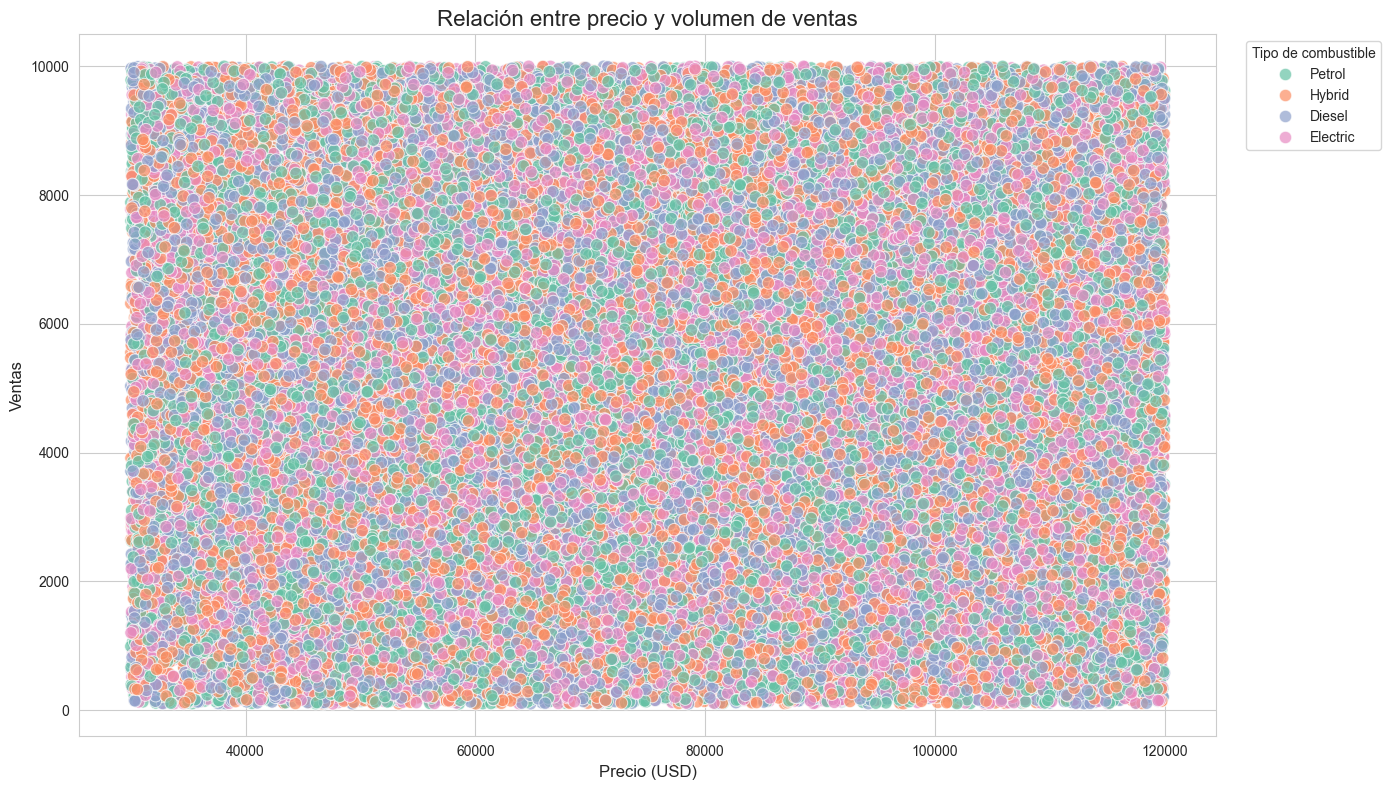

In [21]:
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")
sns.scatterplot(data=df, x='Price_USD', y='Sales_Volume', hue='Fuel_Type', alpha=0.7, s=80, palette='Set2')
plt.title('Relación entre precio y volumen de ventas', fontsize=16)
plt.xlabel('Precio (USD)', fontsize=12)
plt.ylabel('Ventas', fontsize=12)
plt.legend(title='Tipo de combustible', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()